In [1]:
%load_ext autoreload
%autoreload 1
import pandas as pd
import os
import sys
scriptpath = "binarygridsearch.py"
# Do the import
sys.path.append(os.path.abspath(scriptpath))
# Do the import
import binarygridsearch as bgs
%aimport binarygridsearch

In [2]:
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [3]:
#Define a function that just returns accuracy
def getForestAccuracy(X, y, metric, kwargs):
    clf = RandomForestClassifier(**kwargs)
    clf.fit(X, y)
    y_pred = clf.oob_decision_function_[:, 1]
    return metric(y, y_pred)

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X, y = data.data, data.target

In [5]:
rfArgs = {"random_state": 0,
          "n_jobs": -1,
          "class_weight": "balanced",
         "n_estimators": 18,
         "oob_score": True}

In [6]:
max_depth = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracy,        
                    rfArgs, 
                    roc_auc_score, 
                    "max_depth", 
                    0, 
                    1, 
                    32)

,max_depth,score,time,scoreTimeRatio
0,1,0.149573,1.180875,0.000000
1,32,1.149573,0.180875,1.000000
2,16,1.149573,0.254220,0.705625
3,8,1.029020,0.351881,0.449141
4,12,1.149573,0.285106,0.626980


,max_depth,score,time
0,1,0.974050,0.145859
1,32,0.980736,0.140330
2,16,0.980736,0.140736
3,8,0.979930,0.141276
4,12,0.980736,0.140907


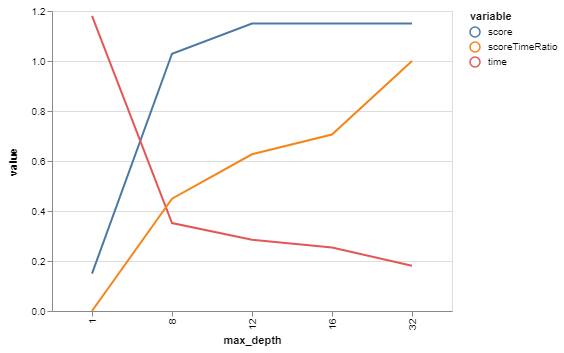

In [7]:
bgs.showTimeScoreChartAndGraph(max_depth)

,min_samples_split,score,time,scoreTimeRatio
0,0.1,1.001828,1.120191,0.137908
1,1.0,0.001828,0.120191,0.000000
2,0.6,0.984183,0.154020,1.000000
3,0.4,0.995294,0.287841,0.540033
4,0.3,0.996671,0.902285,0.170893


,min_samples_split,score,time
0,0.1,0.983702,0.148058
1,1.0,0.436711,0.139738
2,0.6,0.974050,0.140020
3,0.4,0.980128,0.141133
4,0.3,0.980881,0.146245


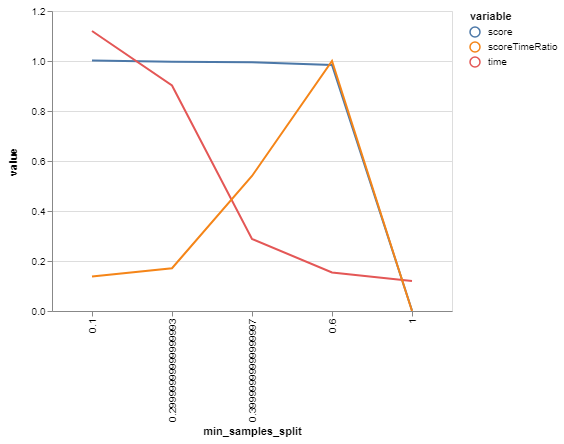

In [11]:
min_samples_split = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracy,        
                    rfArgs, 
                    roc_auc_score, 
                    "min_samples_split", 
                    1, 
                    0.1, 
                    1.0)

bgs.showTimeScoreChartAndGraph(min_samples_split)

,min_samples_leaf,score,time,scoreTimeRatio
0,0.1,1.001836,1.037885,0.520409
1,0.5,0.001836,0.037885,0.000000
2,0.3,0.948145,0.523791,1.000000


,min_samples_leaf,score,time
0,0.1,0.981304,0.164340
1,0.5,0.436711,0.137944
2,0.3,0.952064,0.150770


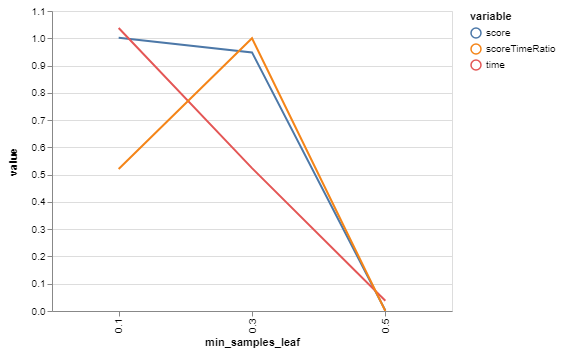

In [7]:
min_samples_leaf = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracy,        
                    rfArgs, 
                    roc_auc_score, 
                    "min_samples_leaf", 
                    1, 
                    0.1, 
                    0.5)

bgs.showTimeScoreChartAndGraph(min_samples_leaf)

,min_weight_fraction_leaf,score,time,scoreTimeRatio
0,0.1,1.001830,1.045120,0.178124
1,0.5,0.001830,0.045120,0.000000
2,0.3,0.988824,0.190362,1.000000


,min_weight_fraction_leaf,score,time
0,0.1,0.983299,0.160982
1,0.5,0.436711,0.138819
2,0.3,0.976190,0.142038


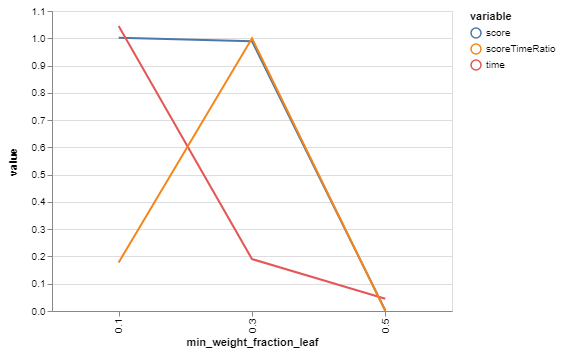

In [8]:
min_weight_fraction_leaf = bgs.compareValsBaseCase(X, 
                    y, 
                    getForestAccuracy,        
                    rfArgs, 
                    roc_auc_score, 
                    "min_weight_fraction_leaf", 
                    1, 
                    0.1, 
                    0.5)

bgs.showTimeScoreChartAndGraph(min_weight_fraction_leaf)

In [9]:
min_weight_fraction_leaf.estimators_ 

AttributeError: 'DataFrame' object has no attribute 'estimators_'

In [10]:
2 + 2

4